In [4]:
import sys
import os
import yaml
sys.path.append("..")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from churn.domain.domain_utils import get_rootdir
from churn.infrastructure.bank_customers import BankCustomersData
from churn.domain.bank_customers_dataset import FeaturesDataset


In [6]:
#Accessing Data
param_file = os.path.join(get_rootdir(),
                              "churn/config/config_template.yml")
with open(param_file, "r", encoding="utf-8") as fparam:
        cfg_dict = yaml.load(fparam, Loader=yaml.FullLoader)

indicators_path = os.path.join(get_rootdir(),
                                   cfg_dict["data"]["indicators_dataset"])
customers_path = os.path.join(get_rootdir(),
                                  cfg_dict["data"]["customers_dataset"])

    

In [7]:
bcd = BankCustomersData(indicators_path, customers_path)
raw_data = bcd.load_data()

### **Data Exploration**
##### Jeu de données :

|   Variables   |   Définition |   Type |   
|---    |:-:    |   --:|
| ID_CLIENT | Identifiant du client | Index |
|DATE_ENTREE | Date d'entrée du client | Datetime |
| NOM | Nom du client | Object |
|PAYS | Pays de naissance | Object |
|AGE | Age du client | Integer |
| MEMBRE_ACTIF | Indicateur d'activité du client | Boolean |
| BALANCE | Solde du client | Float |
| NB_PRODUITS | Nombre de produits détenus | Integer |
| CARTE_CREDIT | Indicateur de détention d'une CB | Boolean |
| SALAIRE | Salaire estimé du client | Float |
| SCORE_CREDIT | Score de crédit | Float |
| CHURN | Indicateur d'attrition du client  <br/> (Target) | Boolean |



In [9]:
raw_data.head()

,BALANCE,NB_PRODUITS,CARTE_CREDIT,SALAIRE,SCORE_CREDIT,CHURN,DATE_ENTREE,NOM,PAYS,SEXE,AGE,MEMBRE_ACTIF
ID_CLIENT,,,,,,,,,,,,
15688172,0.00,2,True,88947.56,677.0,False,2015-06-01,Tai,Espagne,False,40,False
15787258,0.00,14,True,NaN,NaN,False,2014-04-01,Ross,Espagne,True,29,False
15791700,118079.47,4,True,143007.49,773.0,True,2018-01-01,Ugochukwutubelum,Allemagne,False,47,True
15569438,106702.94,2,False,198313.69,607.0,False,2010-01-01,Mai,Allemagne,False,36,False
15778947,0.00,2,True,8742.91,628.0,False,2017-05-01,Sullivan,France,False,36,True


In [86]:
raw_data.describe()

,BALANCE,NB_PRODUITS,SALAIRE,SCORE_CREDIT,AGE
count,9932.000000,9950.000000,9721.000000,9391.000000,9950.000000
mean,76449.491196,1.770653,100043.067155,650.990629,40.101508
std,62420.386792,1.782940,57556.160692,96.505558,14.136425
min,0.000000,1.000000,11.580000,350.000000,18.000000
25%,0.000000,1.000000,50972.600000,584.000000,32.000000
50%,97221.520000,2.000000,100130.950000,652.000000,37.000000
75%,127639.372500,2.000000,149370.930000,718.000000,44.000000
max,250898.090000,16.000000,199992.480000,850.000000,149.000000


In [61]:
raw_data_quant = raw_data[["BALANCE","SALAIRE","SCORE_CREDIT", "AGE", "NB_PRODUITS", "CHURN"]]

In [68]:
raw_data_cat =  raw_data[["SEXE","CARTE_CREDIT","PAYS", "MEMBRE_ACTIF", "CHURN"]]

In [62]:
def var_distribution(subplot_nb:int, var_name:str, target = raw_data_quant.CHURN):
    plt.subplot(4,2,subplot_nb)
    raw_data_quant.loc[~target, var_name].hist(bins = 50, density = True, label = "no churn")
    raw_data_quant.loc[target, var_name].hist(bins = 50, density = True, label = "churn")
    plt.title(f"Distribution de la variable {var_name}")
    plt.legend()


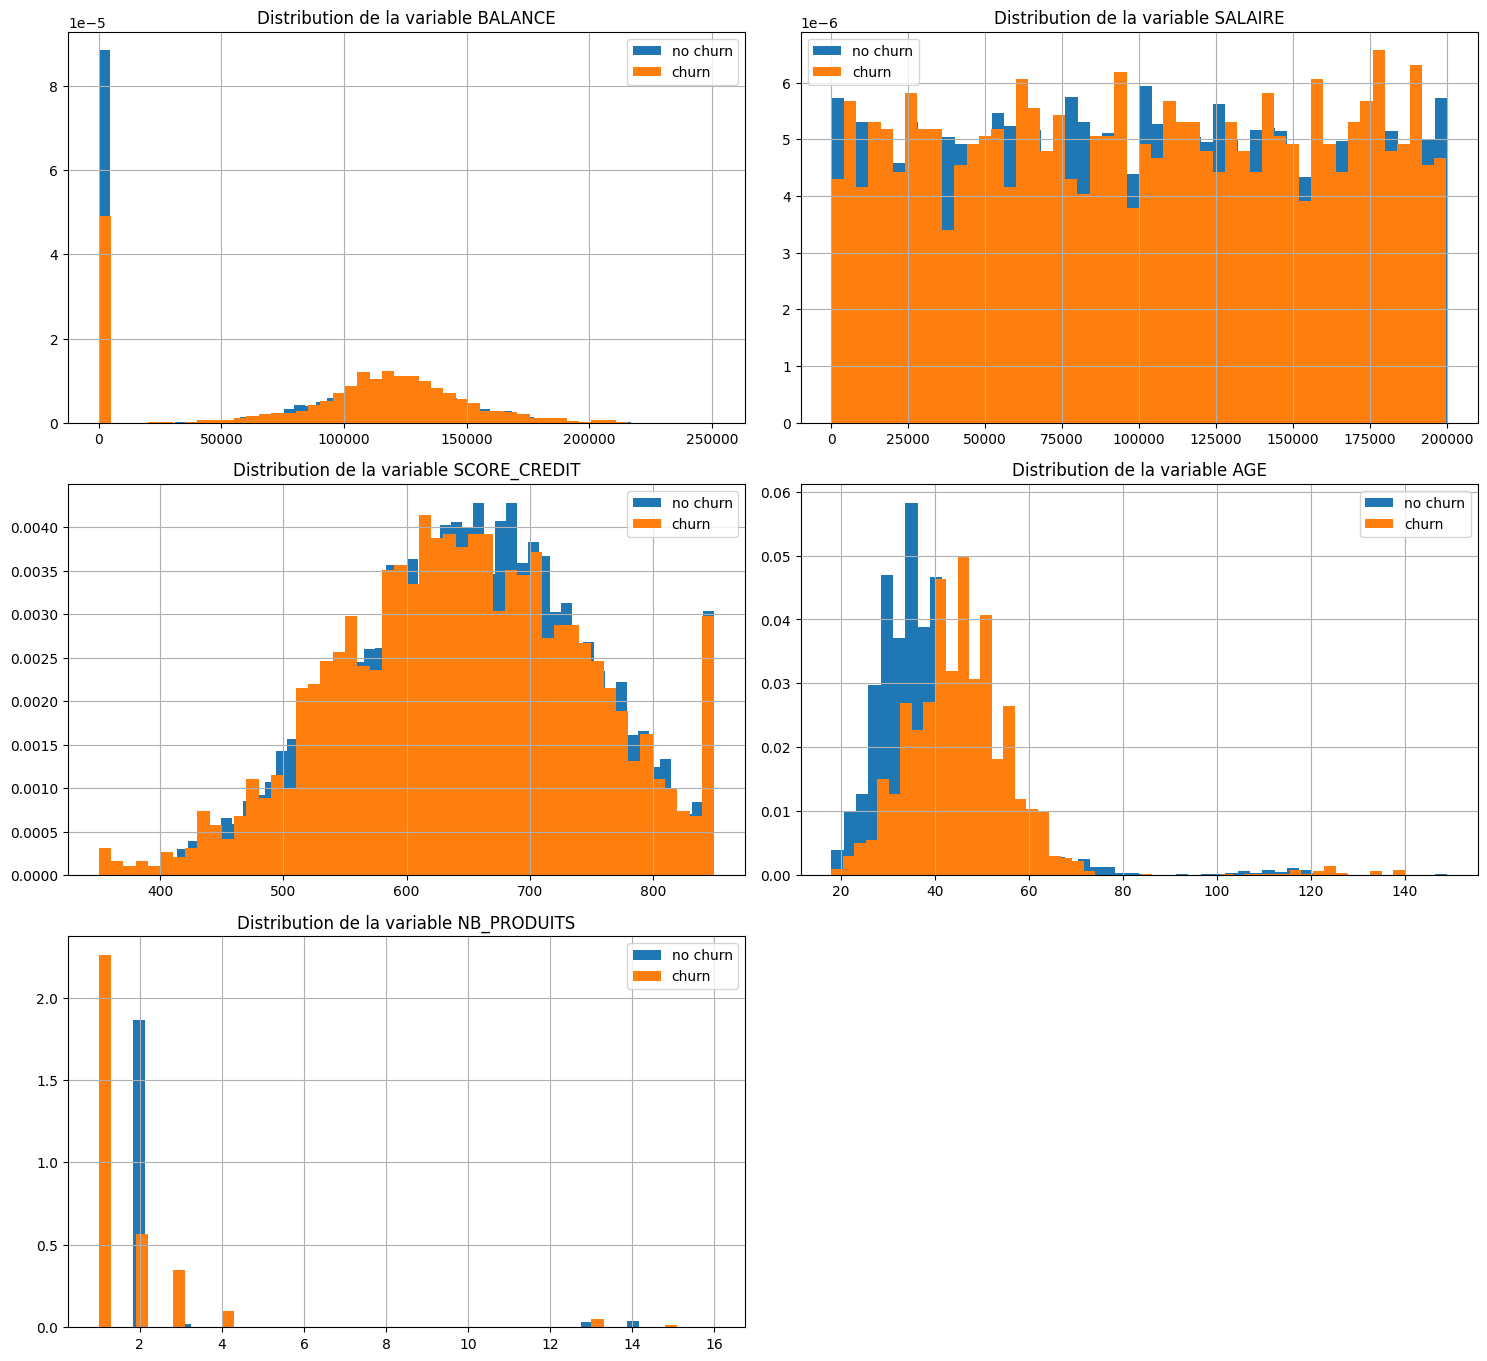

In [65]:
plt.figure(figsize=(15, 18))
var_distribution(1, "BALANCE")
var_distribution(2, "SALAIRE")
var_distribution(3, "SCORE_CREDIT")
var_distribution(4, "AGE")
var_distribution(5, "NB_PRODUITS")
plt.tight_layout()

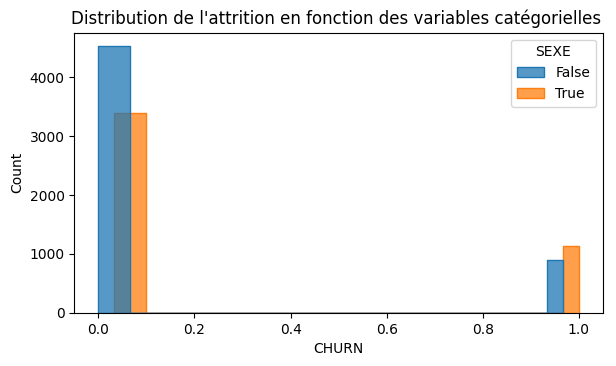

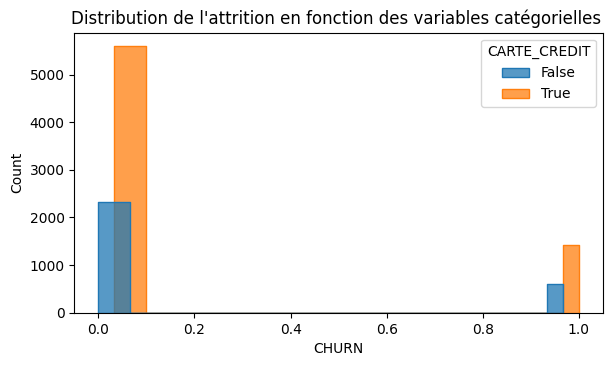

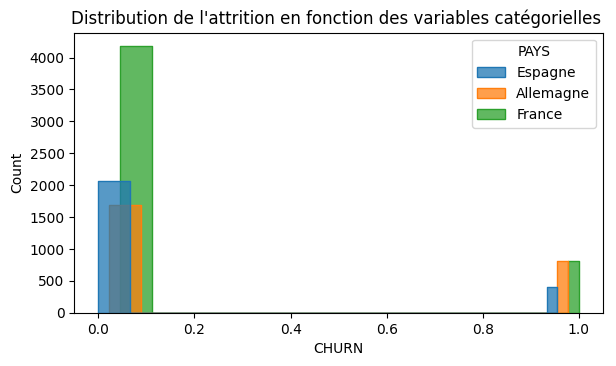

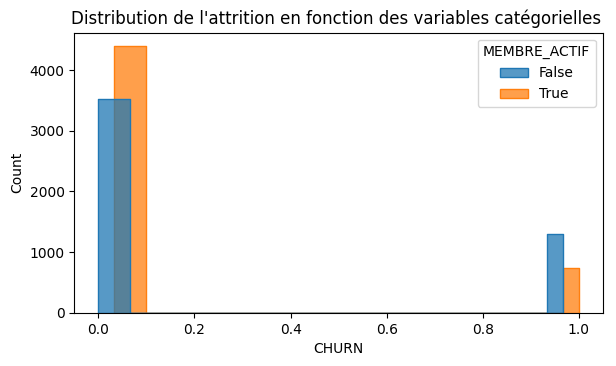

In [82]:
import warnings
warnings.simplefilter('ignore')
def target_vs_category_visual(dataframe,target, categorical_col, subplot_nb):
    plt.figure(figsize=(15,8))
    plt.subplot(2,2, subplot_nb)
    sns.histplot(x=target,hue=categorical_col, data=raw_data_cat,element="step",multiple="dodge")
    plt.title(f"Distribution de l'attrition en fonction des variables catégorielles ")

for col, i in zip(raw_data_cat.columns[:-1], range(1,5)):
    target_vs_category_visual(raw_data_cat,"CHURN",col, i)


Conclusions :

- Les femmes sont plus sujettes à l'attrition
- Les clients possédant une carte de crédit ont un taux d'attrition plus faible
- Les membres actifs quittent moins la banque
- Les français ont le taux d'attrition le moins élevé


<AxesSubplot: >

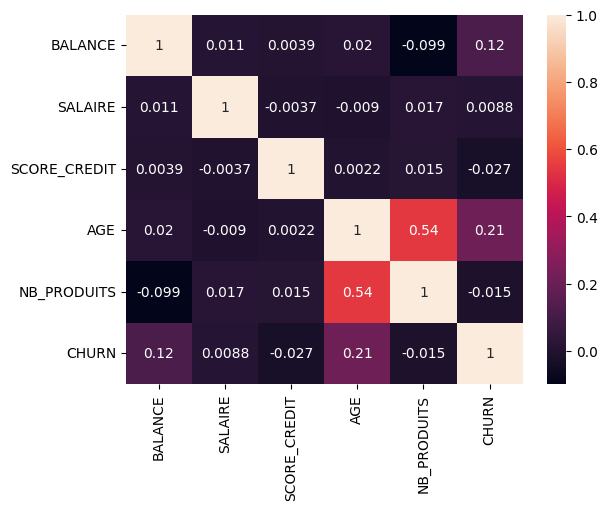

In [87]:
corr_matrix = raw_data_quant.corr()
sns.heatmap(corr_matrix, annot=True)

Conclusions :

- Les variables sont très peu corrélées entre elles
- L'age est corrélé positivement à la variable cible
- Les personnes agées sont plus sensibles à l'attrition
- La variable SCORE_CREDIT est corrélées négativement à la variable cible
- Une forte corrélation entre AGE et NB_PRODUITS
- Exprime que les clients agées possèdent plus de produits bancaires

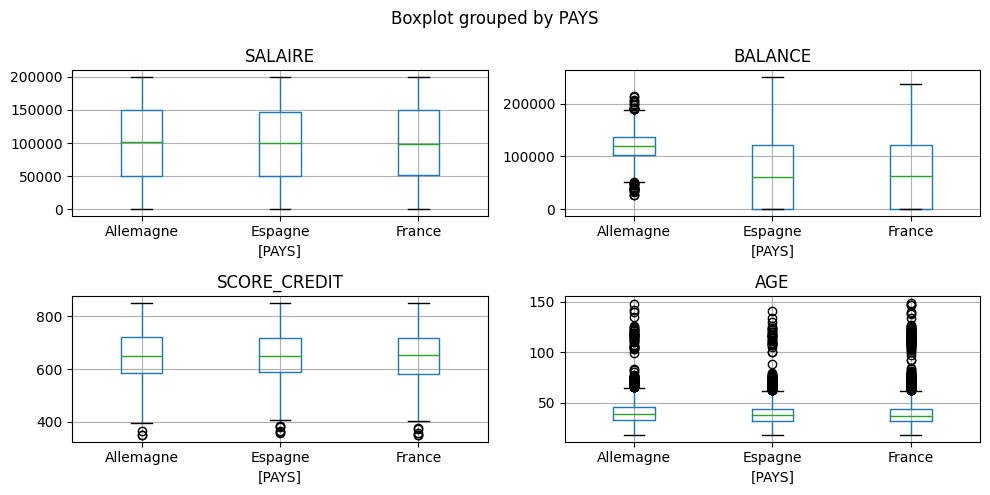

In [88]:
f, vax = plt.subplots(2,2, figsize=(10,5))

for ax, col in zip(iter(vax.flat), ["SALAIRE", "BALANCE", "SCORE_CREDIT", "AGE"]):
    raw_data.boxplot(column=[col], ax=ax, by=["PAYS"])
    
    

plt.tight_layout()
